# Linear Regression Workflow

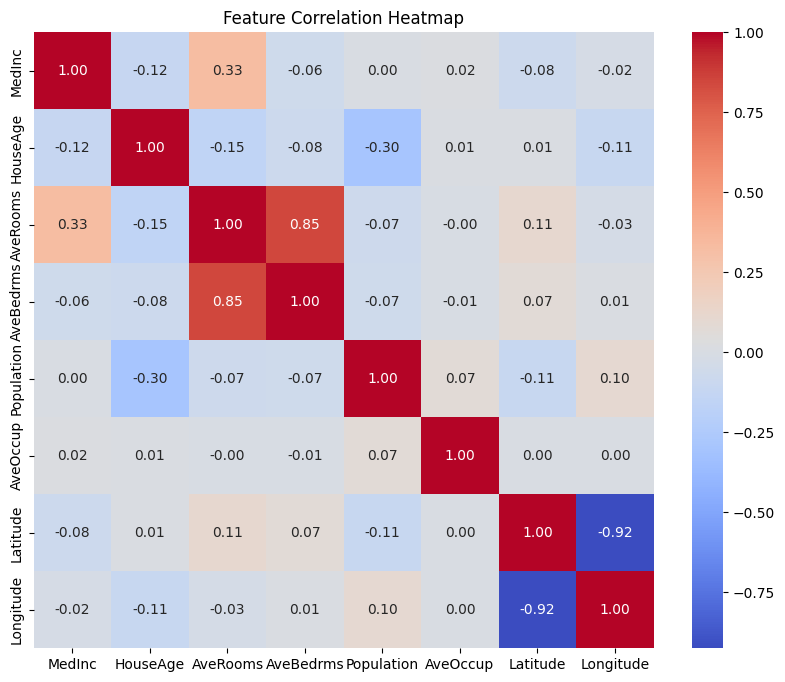

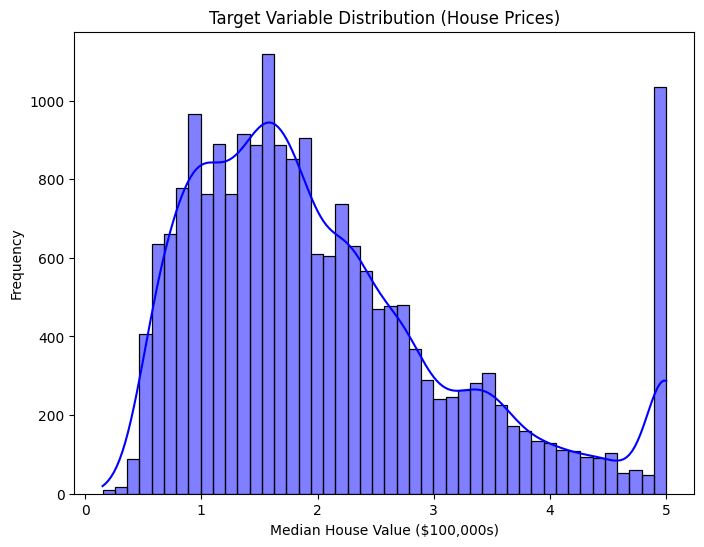

Model Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Model Intercept: 2.0719469373788777
Mean Squared Error (MSE): 0.5558915986952444


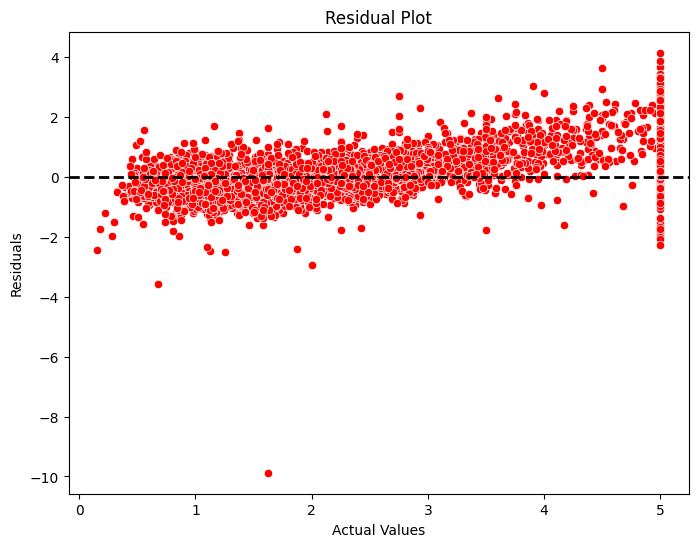

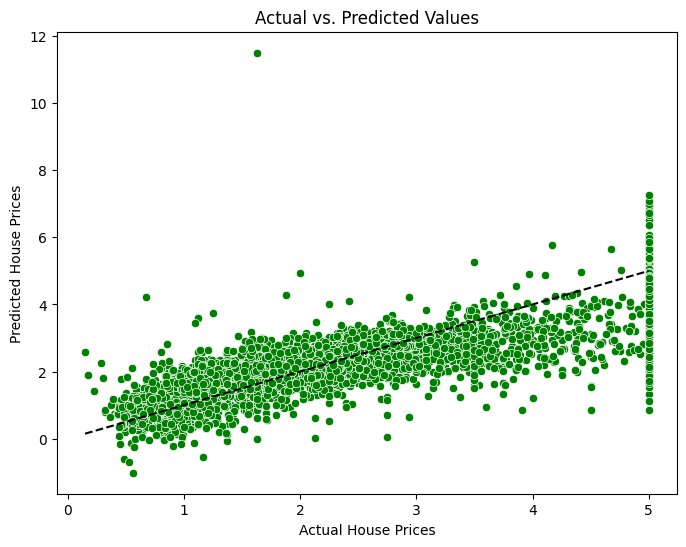

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
from sklearn.datasets import fetch_california_housing  # For a realistic dataset
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import mean_squared_error  # For evaluating regression performance

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data  # Features (e.g., median income, number of rooms, etc.)
y = data.target  # Target variable (median house value in $100,000s)


# Visualize feature correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualize the target variable's distribution
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='blue')
plt.title("Target Variable Distribution (House Prices)")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)  # Predicted values for the test set

# Print model coefficients
print("Model Coefficients:", model.coef_)

# Print the model intercept
print("Model Intercept:", model.intercept_)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize residuals (errors) to check for patterns
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# Visualize Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()


---

## Correlation Heatmap
A feature correlation heatmap is a visual representation of the relationships between features in a dataset. It helps in understanding how strongly one feature is related to another.


### **Key Reasons to Use Feature Correlation Heatmaps**

**1. Detect Multicollinearity**

* **What it is:** Multicollinearity occurs when two or more features are highly correlated, meaning they provide redundant information.
* **Why it matters:**
    * Multicollinearity can confuse models like Linear Regression by making it harder to estimate feature importance (coefficients).
    * High correlation can also inflate variances, leading to unstable predictions.
* **What to do:**
    * Drop one of the highly correlated features.
    * Use dimensionality reduction techniques like PCA if multiple features are correlated.

**2. Identify Relationships Between Features**

* **What it shows:**
    * Strong positive correlations (close to +1) indicate that as one feature increases, the other also increases.
    * Strong negative correlations (close to -1) indicate an inverse relationship.
    * Values close to 0 mean little or no linear relationship.
* **Why it matters:** Helps in selecting or engineering features for better predictive power.

**3. Feature Selection and Simplification**

* **Why simplify?** Including highly correlated features can lead to overfitting and unnecessary complexity.
* **Actionable insights:** After visualizing the correlations:
    * Choose features that are less correlated with each other but highly correlated with the target variable.

**4. Domain Understanding**

* **Why it's helpful:** Provides insights into how the features interact in the context of the dataset.
* **Example:** In the California Housing Dataset, you might see:
    * Median income is strongly correlated with house prices.
    * Average number of rooms might have a weaker correlation.

### How the code works
```
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")`
plt.title("Feature Correlation Heatmap")`
plt.show()
```
 

**X.corr():**

* **Computes:** Pairwise correlation between all features in X (default: Pearson correlation coefficient).
* **Returns:** A matrix where each value represents the correlation between two features.

**sns.heatmap:**

* **annot=True:** Displays the correlation values in the heatmap cells for easy interpretation.
* **cmap='coolwarm'**: Provides a diverging color scheme:
    * Red indicates negative correlation.
    * Blue indicates positive correlation.
* **fmt=".2f"**: Formats values to two decimal places.

**Interpretation:**

* Look for values close to +1 or -1 to detect strong correlations.
* Focus on relationships that matter for your problem (e.g., features highly correlated with the target).

---

## Visualize Target Variable's Distribution
It helps in identifying patterns, anomalies, and preparing for model building.

### Key Reasons To Check Distribution

**1. Understanding the Data's Nature**

* **What it shows:** The overall shape of the distribution (e.g., normal, skewed, or multimodal).
* **Why it matters:**
    * Many machine learning algorithms (e.g., linear regression) assume that the target variable is normally distributed.
    * If the distribution is highly skewed, transformations like log or Box-Cox might be necessary to improve model performance.

**2. Identifying Outliers**

* **What it shows:** Extreme values that deviate from the majority of the data.
* **Why it matters:**
    * Outliers can distort model training, especially for algorithms sensitive to numerical extremes (e.g., regression models).
    * Allows you to decide whether to remove, cap, or handle outliers differently.

**3. Checking Homoscedasticity**

* **What it is:** Homoscedasticity means the variance of the target variable is constant across its range.
* **Why it matters:**
    * For models like linear regression, constant variance in the target ensures unbiased predictions.
    * Visualizing the spread helps identify potential heteroscedasticity issues, which could require scaling or transformation.

**4. Detecting Multimodal Distributions**

* **What it shows:** If there are multiple peaks in the distribution.
* **Why it matters:**
    * Multimodal distributions might indicate the need for clustering or separate modeling for subpopulations.

**5. Choosing the Right Evaluation Metric**

* **What it shows:** How concentrated or spread out the target values are.
* **Why it matters:**
    * Skewed distributions might require custom evaluation metrics (e.g., using log-transformed metrics for highly skewed targets).

### How the Code Works



```
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='blue')  # kde=True adds a smooth curve over the histogram
plt.title("Target Variable Distribution (House Prices)")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()
```
**sns.histplot(y, kde=True):**

* **Displays:** The histogram of the target variable.
* **kde=True:** Overlays a kernel density estimate (a smooth curve) to visualize the underlying distribution.

**Insights to Look For:**

* **Symmetry:** Indicates normality.
* **Skewness:** 
    * If the histogram leans left or right.
    * Right-skewed: Common for house prices (many lower values, few extremely high ones).
    * Left-skewed: Less common but may need handling.
* **Peaks:** Single vs. multiple peaks, indicating subpopulations.
* **Spread:** The range of target values.


---

## Standardizing Features
Standardizing features is an essential preprocessing step in many machine learning algorithms. It transforms the features to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the model’s learning process.

### Importance

**Equal Weight for All Features:**

* Many machine learning algorithms are sensitive to the scale of the features. 
* Features with larger ranges can dominate the model, causing it to be biased toward those features.
* Standardization ensures all features are treated equally, especially when their scales are different.

**Improving Convergence in Optimization Algorithms:**

* Algorithms like Gradient Descent (used in linear regression, logistic regression, neural networks, etc.) perform better and converge faster when the features are standardized. 
* This is because the gradient updates are more consistent across all features. 
* Without standardization, features with large values can cause erratic updates in model parameters, slowing down training.

**Important for Distance-Based Algorithms:**

* Algorithms that rely on distances (e.g., K-Nearest Neighbors (KNN), Support Vector Machines (SVM)) are heavily affected by feature scales. 
* Without standardization, features with large scales dominate the distance calculations, affecting the performance of the model.

**Handling Multicollinearity in Linear Models:**

* In models like Linear Regression or Logistic Regression, standardizing the features can reduce issues related to multicollinearity, where highly correlated features with different scales might distort the model’s ability to interpret them properly.

### When to Standardize

**You should standardize features in the following scenarios:**

* **Distance-Based Algorithms:**
    * Algorithms like KNN, SVM, and K-Means Clustering are sensitive to the scale of the features, so you must standardize the data.

* **Linear Models (e.g., Linear/Logistic Regression):**
    * Standardization helps ensure that features with larger values don't dominate the learning process, especially when the features have different units (e.g., one feature is in dollars and another is in years).
    * It also helps improve the convergence of gradient-based optimization algorithms used in these models.

* **Neural Networks:**
    * Neural networks use gradient-based optimization, which benefits from standardized data to converge faster and avoid being biased by large feature scales.

* **PCA (Principal Component Analysis):**
    * When applying PCA, it’s crucial to standardize the features because PCA is sensitive to the variances in the data. 
    * Features with larger variances (and hence larger scales) will dominate the principal components.

### When NOT to Standardize Features
You don't always need to standardize your features. In some cases, it can be unnecessary or even detrimental:

**Tree-Based Algorithms (e.g., Decision Trees, Random Forest, Gradient Boosting):**

* These models are not sensitive to feature scaling. 
* Decision trees and other tree-based algorithms split data based on thresholds, and this is unaffected by the scale of the features.
* No need to standardize data when using these models.

**Sparse Data:**

* If your dataset is sparse (contains many zeros, as is the case in text classification or some recommender systems), standardization can sometimes distort the data by changing the sparsity pattern. 
* In such cases, scaling might not be needed.

### How the Code Works

```
# Standardize the features
scaler = StandardScaler()

# Fit scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)
```
**Key Points:**

* **fit_transform(X_train):**
    * This computes the mean and standard deviation of the training data.
    * Then scales the training data to have a mean of 0 and a standard deviation of 1.

* **transform(X_test):**
    * This uses the mean and standard deviation computed from the training set to scale the test data. 
    * This ensures the model sees the test data in the same scale as the training data.


**Furthermore**:

**Why fit_transform() is only used on X_train:**

* **fit_transform() on X_train:**
    * The `fit()` part computes the mean and standard deviation from the training data (X_train).
    * The `transform()` part applies this scaling to the training data (X_train), resulting in features with a mean of 0 and a standard deviation of 1.

* **transform() on X_test:**
    * After the training data has been standardized (using `fit_transform()`), we only use `transform()` on X_test.
    * The test data should not influence the scaling process. 
    * The mean and standard deviation for standardization should be computed only from the training data.
    * This ensures the model is tested on data that has been transformed according to the characteristics of the training data (i.e., the scaling parameters).

* **Using transform() on X_test:**
    * Means the test data is scaled using the same parameters (mean and standard deviation) derived from the training data. 
    * This ensures the model is evaluated on data that is consistent with how the training data was processed.


**Why not fit_transform() on X_test?**

* If we were to use `fit_transform()` on X_test, it would:
    * **Leverage information from the test set:** The `fit()` function would compute a new mean and standard deviation based on the test data. This would make the scaling depend on the test data, which introduces data leakage and undermines the principle of training-test separation.
    * **Impact model evaluation:** The test set should simulate real-world, unseen data that the model has not been trained on. If the test data influences the scaling, it violates the assumption that the test data should be independent of the model-building process.

### Summary 
* **Always standardize when using:**
    * Distance-based models (e.g., KNN, SVM).
    * Linear models (e.g., Linear Regression, Logistic Regression).
    * Neural Networks.
    * PCA (Principal Component Analysis).

* **Do not standardize when using:**
    * Tree-based models (e.g., Decision Trees, Random Forest, Gradient Boosting).

* **Standardization improves model performance by:**
    * Making sure all features contribute equally to the learning process.

---

## Initialize and Train Model

### What Does It Mean to Initialize a Model?

* **Initialization:** 
    * When you initialize a model (e.g., `model = LinearRegression()`), you are creating an instance of the machine learning algorithm with its default (or specified) parameters.
    * At this stage, the model is empty and has no knowledge of the training data. 
    * It’s essentially a blank slate ready to learn.

* **Why Do We Initialize?**
    * Initialization allows you to configure any algorithm-specific parameters, such as learning rate, regularization terms, or any other hyperparameters that influence how the model behaves during training.

### Training the Model: `model.fit()`

**What Does fit() Do?**

* The `fit()` method is where the actual training happens. 
* The model learns the relationship between the input features (X_train_scaled) and the target variable (y_train).
* During this step:
    * The model computes the best-fit parameters (like weights and bias in linear regression) based on the training data.
    * In the case of linear regression, it finds the weights (coefficients) and intercept that minimize the error between the predicted and actual values using a method like Ordinary Least Squares (OLS).

**What Data Does It Use?**

* The `fit()` method only uses the training data (X_train_scaled and y_train), ensuring the model learns patterns only from data it has seen during training.

**Linear Regression Specifics:**

* **Weights (Coefficients):** 
    * Represent the contribution of each feature to the target variable. 
    * They indicate how much the target variable changes when the feature changes by one unit, holding all else constant.
* **Intercept:** 
    * Represents the value of the target variable when all features are zero. 
    * It’s the starting point of the model before accounting for any feature contributions.

---

## Y_Pred

y_pred represents the predicted values for the target variable, generated by the trained model when applied to a dataset. It’s the model’s attempt to predict the outputs (y) based on the input features (X) provided during the prediction step.

### Code
```
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)  # Predicted values for the test set
```
1. **model.predict():**

    * This method uses the trained model (after `fit()` has been called) to compute predictions for the input data passed to it.
    * In this case, we pass the scaled test data (X_test_scaled) to the `predict()` function.

2. **X_test_scaled:**

    * The test features have already been standardized using the scaler fitted on the training data. 
    * This ensures the test data is on the same scale as the training data.

3. **y_pred:**

    * The output of `model.predict()` is an array of predicted target values corresponding to the input data (X_test_scaled).
    * Each value in `y_pred` is the model’s best estimate for the corresponding value in the actual test target (y_test).

### Why is y_pred Important? 

1. **Evaluation of Model Performance:**

    * By comparing y_pred (predictions) to y_test (true values), you can evaluate how well the model generalizes to unseen data.
    * Metrics like Mean Squared Error (MSE), R-squared, and others are calculated using y_pred and y_test.

2. **Real-World Predictions:**

    * After training, the model is often used to make predictions on new, unseen data. 
    * y_pred represents what the model would output in such real-world applications.

3. **Understanding Model Accuracy:**

    * By visualizing y_pred against y_test (e.g., in a scatter plot), you can observe how close the predictions are to the actual values and identify any patterns or biases in the model.

---

## Coefficient and Intercept

### Formula

In linear regression, the model’s goal is to fit a line (or hyperplane in higher dimensions) to the data that minimizes the error between predicted and actual values. 

The equation of this line is:

y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

where:

* **β₀ (intercept)** is the predicted value of y when all features are 0.
* **β₁, β₂, ..., βₙ (coefficients)** are the weights that determine the contribution of each feature to the target variable.

### model.coef_

* **Definition:** 
    * `model.coef_` provides the coefficients (β₁, β₂, ..., βₙ) for each feature in the linear regression model.

* **Importance:**
    * **Feature Contribution:** 
        * Each coefficient indicates how much the target variable changes when the corresponding feature increases by one unit, assuming all other features are constant.
        * A larger magnitude of a coefficient suggests a stronger relationship with the target variable.
    * **Feature Importance:** 
        * By examining the coefficients, you can determine which features have the most significant impact on the predictions.
        * Positive coefficients mean the feature increases the target value, while negative coefficients mean it decreases the target value.

    * **Example:** 
        * If a feature’s coefficient is 2.5, increasing the feature value by 1 increases the predicted target value by 2.5.

### model.intercept_

* **Definition:** 
    * `model.intercept_` represents the intercept (β₀), which is the predicted value of the target variable when all features are 0.

* **Importance:**
    * **Baseline Prediction:** 
        * The intercept provides a starting point for predictions when no features contribute (i.e., all feature values are 0).
    * **Real-World Interpretation:** 
        * In many cases, the intercept has a clear practical meaning. For example, if you’re predicting house prices and the intercept is $50,000, it suggests that the baseline price of a house (without considering any features) is $50,000.

### Key Points

* **Model Coefficients (model.coef_)**
    * Quantify the relationship between each feature and the target variable.
    * Help identify the most important predictors in the dataset. 

* **Model Intercept (model.intercept_)**
    * Provides the baseline prediction when all features are zero.
    * Helps understand the starting point of the prediction model.

### Why Are They Important?

**Interpretability:**

* In linear regression, the coefficients and intercept make the model highly interpretable, allowing you to understand the exact impact of each feature on the target.

**Feature Selection:**

* Features with very small coefficients may have minimal impact and could potentially be removed to simplify the model.

**Domain Insights:**

* By analyzing coefficients and intercepts, you can gain insights into the relationships within the data.

---

## Mean Squared Error (MSE)

### Formula

**Mean Squared Error (MSE)**

* A commonly used metric for evaluating the performance of regression models.
* Calculates the average squared difference between the actual target values (y<sub>test</sub>) and the predicted target values (ŷ<sub>test</sub>):
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

where:
  * n is the number of data points in the test set.
  * y<sub>i</sub> is the actual target value for the i-th data point.
  * ŷ<sub>i</sub> is the predicted target value for the i-th data point.

**Key Properties:**

* **Non-Negative:** MSE is always non-negative because it squares the errors, eliminating negative values.
* **Emphasis on Large Errors:** Squaring the errors penalizes larger errors more than smaller ones, making MSE sensitive to outliers.

### Importance

**Model Evaluation:**

* MSE provides a single numerical value to assess how well the model predictions match the actual values. 
* A lower MSE indicates better performance.

**Comparison Between Models:**

* You can use MSE to compare different models. 
* The model with the lower MSE is generally considered better for the dataset.

**Outlier Sensitivity:**

* Since MSE penalizes large errors, it helps highlight models that are affected by outliers, which might require attention (e.g., robust regression techniques).

**Units of Measurement:**

* The value of MSE is in the square of the units of the target variable, which can make it harder to interpret directly. 
* However, taking the square root of MSE gives the Root Mean Squared Error (RMSE), which is in the same units as the target variable.

### Example

Suppose the output is MSE = 23.67

**Interpretation:**

* An MSE of 23.67 means the average squared difference between the actual and predicted values is 23.67.
* This suggests the model's predictions are, on average, not extremely far from the actual values, but a more interpretable metric (like RMSE) might help.

### Pros and Cons

**Advantages of MSE:**

* **Mathematically Convenient:** MSE is differentiable, which makes it suitable for optimization algorithms like gradient descent.
* **Penalizes Large Errors:** Ensures that the model doesn’t produce large prediction errors for certain data points.

**Limitations of MSE:**

* **Outlier Sensitivity:** Large errors disproportionately affect the value of MSE due to squaring.
* **Interpretability:** Since MSE is in squared units, it can be less intuitive to interpret directly compared to RMSE.

**When to Use MSE:**

* Use MSE when you want a metric that penalizes large errors more severely, especially if outliers are a critical concern.

* Consider alternatives like Mean Absolute Error (MAE) or RMSE if interpretability or robustness to outliers is more important.

---

## Residuals

**Residuals**

* Residuals are the differences between the actual target values (y<sub>test</sub>) and the predicted target values (ŷ<sub>test</sub>):

### Why Visualize Residuals?

**Check for Patterns:**

* Residuals should ideally be randomly distributed around zero. 
* Patterns in the residual plot may indicate that the model is missing important relationships or that assumptions about linearity are violated.

**Assess Linearity:**

* For linear regression, residuals should not show a clear trend. 
* If they do, the model may not be capturing the underlying relationships properly, suggesting the need for a more complex model.

**Identify Heteroscedasticity:**

* Heteroscedasticity occurs when the spread of residuals increases or decreases with the actual values. 
* This violates an important assumption of linear regression and can impact the model's reliability.

**Detect Outliers:**

* Large residuals indicate data points where the model performed poorly. 
* Identifying and addressing these outliers may improve model performance.

### Code Explanation

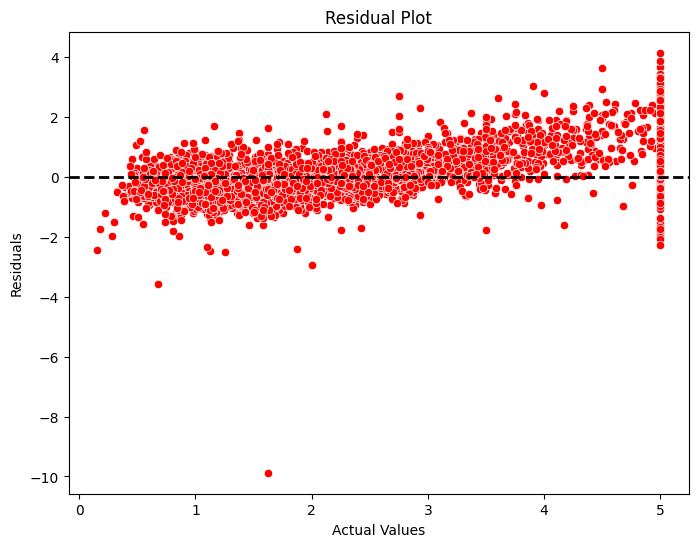

In [2]:
# Calculate residuals
residuals = y_test - y_pred

# Visualize residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='red')  # Scatter plot of actual values vs. residuals
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Horizontal line at residual = 0
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

**Key Features of the Plot:**

* **Scatter Points:**
    * Each point represents the residual for a single data point.
    * The x-axis is the actual target value (y<sub>test</sub>).
    * The y-axis is the residual (y<sub>test</sub> - ŷ<sub>test</sub>).

* **Horizontal Line at Zero:**
    * This is the baseline where residuals are zero. 
    * Ideally, residuals should scatter evenly around this line without systematic patterns.

**Example Interpretation:**

* **Good Model Fit:**
    * Residuals are randomly scattered around zero with no visible pattern.
    * Indicates the model is appropriate for the data and captures the relationship effectively.

* **Poor Model Fit:**
    * Residuals form a pattern (e.g., curved, cone-shaped, or clustered).
    * Suggests the model is missing key features, non-linearity exists, or assumptions like homoscedasticity are violated.

* **Outliers:**
    * Points with very large residuals (far from zero) may indicate outliers that could skew the model's results.

### Importance

**Model Validation:**

* Helps confirm if the linear regression assumptions (e.g., linearity, constant variance) hold true.

**Diagnosing Problems:**

* Detects non-linearity, heteroscedasticity, and other issues that may require feature engineering, transformation, or using a different model.

**Improving Predictions:**

* Insights from residuals can guide improvements to the model, such as adding new features or applying non-linear transformations.

## Visualizing Actual vs Predicted Values

This visualization compares the actual target values (y<sub>test</sub>) with the predicted values (ŷ<sub>test</sub>). 

It is a crucial diagnostic tool in regression analysis to evaluate how well the model's predictions align with the actual outcomes.

### Code

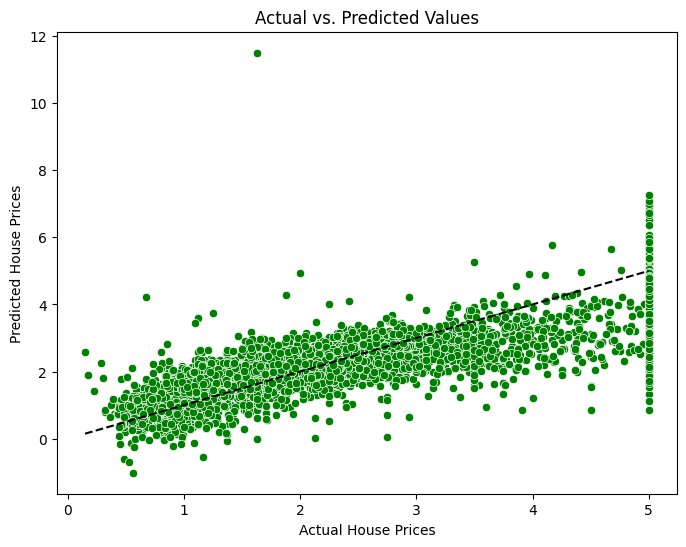

In [3]:
# Visualize Actual vs. Predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.scatterplot(x=y_test, y=y_pred, color='green')  # Scatter plot of actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='black', linestyle='--')  # Diagonal line for perfect predictions
plt.title("Actual vs. Predicted Values")  # Add plot title
plt.xlabel("Actual House Prices")  # Label for x-axis
plt.ylabel("Predicted House Prices")  # Label for y-axis
plt.show()  # Display the plot


### Key Features of the Plot

**Scatter Points (Green):**

* Each point represents a data instance (an observation, in this case, a house).
* The x-coordinate is the actual target value, aka, the actual house price (y<sub>test</sub>).
* The y-coordinate is the predicted target value, aka, model's prediction of the house price (ŷ<sub>test</sub>).

**Diagonal Line (Black Dashed Line):**

* Represents the ideal scenario where the predicted values are equal to the actual values (ŷ<sub>test</sub> = y<sub>test</sub>).
* Points closer to this line indicate better predictions.

### Importance

1. **Assess Model Accuracy:**

    * If most points are close to the diagonal line, the model has high accuracy.
    * Large deviations indicate significant errors for those data points.

2. **Detect Systematic Errors:**

    * If the points form a specific pattern (e.g., consistently over or under the diagonal), it may indicate bias in the model.

3. **Identify Outliers:**

    * Points far from the diagonal are outliers where the model's predictions are significantly off.

4. **Evaluate Homoscedasticity:**

    * Even spread of points around the diagonal line suggests the model captures the variance in the data well.
    * Uneven spread (e.g., a cone shape) might indicate heteroscedasticity.

5. **Visualize Performance Across the Range:**

    * This plot shows whether the model performs consistently across the range of the target variable.
    * For instance, predictions may be accurate for smaller values but less so for larger ones, indicating potential non-linearity.